# Aggregate quotation density across novel time

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sqlalchemy import func

from quotes.models import ChadhNovel, BPOArticle, Alignment
from quotes.services import session

In [10]:
import numpy as np
import math

from quotes.text import Text

def percentile_counts(slug):
    
    novel = ChadhNovel.query.filter_by(slug=slug).one()
    
    alignments = (
        Alignment.query
        .join(BPOArticle)
        .filter(
            Alignment.a_id == novel.id,
            Alignment.size >= 5,
            BPOArticle.object_type == 'Review',
        )
    )
    
    quoted = []
    for a in alignments:
        quoted += range(a.a_start, a.a_start + a.size)

    text = Text(novel.text)
    
    counts = np.zeros(100)
    for offset in quoted:
        counts[math.floor(offset/len(text.tokens)*100)] += 1
        
    return counts

In [ ]:
counts = []
for novel in ChadhNovel.query.all():
    counts.append(percentile_counts(novel.slug))

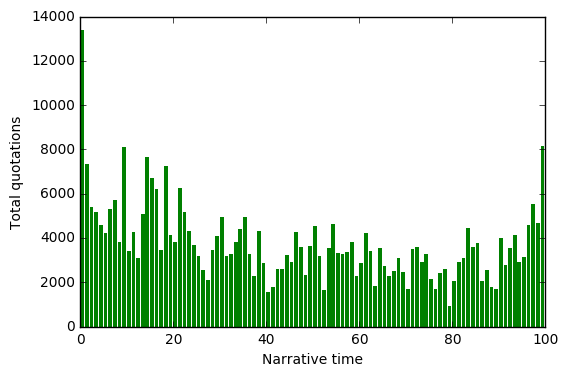

In [29]:
plt.xlabel('Narrative time')
plt.ylabel('Total quotations')

plt.bar(
    np.arange(100),
    sum(counts),
    edgecolor='none',
    color='green',
)

plt.show()

So, beginnings and ends, and maybe something interesting happening at ~15%?